# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

## Initializing encoder object

In [2]:
le = preprocessing.LabelEncoder()

## Loading train and test data

In [3]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Invoke to see all columns' relations to SalePrice

In [5]:
def displayRelations():
    for column in train_data:
        train_data = train_data.sort_values(by=[column])
        fig = plt.scatter(le.fit_transform(train_data[column]), train_data['SalePrice'])
        plt.title(f'SalePrice relation to {column}')
        plt.xlabel(column)
        plt.ylabel('SalePrice')
        plt.show()

# Extracting valuable features

In [6]:
columns = ['MSZoning','LotFrontage', 'LotArea', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

## Label encoding str -> int

In [7]:
for i in range(len(columns)):
    train_data[columns[i]] = le.fit_transform(train_data[columns[i]])
    test_data[columns[i]] = le.fit_transform(test_data[columns[i]])

## Initializing the model and the necessary data

In [8]:
model = LinearRegression()

X = np.array(train_data[columns])
y = np.array(train_data['SalePrice'])

model.fit(X, y)

LinearRegression()

## Suboptimal testing using training data, calculating the difference between real and predicted price

In [9]:
x_to_pred = []
x_pred = []
x_real = []
X_real = []
X_pred = []
i = 1
while i < len(train_data):
    x_to_pred.append(train_data[train_data['Id'] == i][['MSZoning','LotFrontage', 'LotArea', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']])
    x_real.append(train_data[train_data['Id'] == i]['SalePrice'])
    x_pred.append(model.predict(x_to_pred[len(x_to_pred) - 1]))
    X_real.append(x_real[len(x_to_pred) - 1].iloc[0])
    X_pred.append(x_pred[len(x_to_pred) - 1][0])
    print(f"Real price: {X_real[len(X_real)-1]}, predicted: {X_pred[len(X_pred)-1]}, delta: {abs(X_pred[len(X_pred)-1] - X_real[len(X_real)-1])}")
    i += 100

Real price: 208500, predicted: 217698.04144697712, delta: 9198.04144697712
Real price: 205000, predicted: 223944.55926640995, delta: 18944.559266409953
Real price: 140000, predicted: 123472.3658533213, delta: 16527.634146678698
Real price: 157000, predicted: 154337.4018278778, delta: 2662.598172122205
Real price: 245500, predicted: 257254.95313979144, delta: 11754.95313979144
Real price: 113000, predicted: 108982.89588121261, delta: 4017.1041187873925
Real price: 275000, predicted: 289948.81247720507, delta: 14948.812477205065
Real price: 312500, predicted: 305801.45494216046, delta: 6698.545057839539
Real price: 200000, predicted: 193856.34901062903, delta: 6143.650989370974
Real price: 110000, predicted: 88756.21021890061, delta: 21243.78978109939
Real price: 82000, predicted: 92699.42231768754, delta: 10699.422317687538
Real price: 60000, predicted: 44925.64403630426, delta: 15074.355963695743
Real price: 116050, predicted: 61357.66869068606, delta: 54692.33130931394
Real price: 225

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegr

## Visualizing the difference

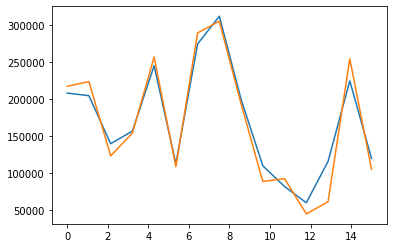

In [10]:
x_dif = np.linspace(0, len(X_real), len(X_real))
plt.plot(x_dif, X_real)
plt.plot(x_dif, X_pred)

## Taking a look at the test data

In [11]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,56,777,Pave,2,Reg,3,0,...,120,0,2,2,3,0,6,2010,8,4
1,1462,20,3,57,964,Pave,2,IR1,3,0,...,0,0,2,4,0,12500,6,2010,8,4
2,1463,60,3,50,947,Pave,2,IR1,3,0,...,0,0,2,2,3,0,3,2010,8,4
3,1464,60,3,54,587,Pave,2,IR1,3,0,...,0,0,2,4,3,0,6,2010,8,4
4,1465,120,3,19,118,Pave,2,IR1,1,0,...,144,0,2,4,3,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,0,19,Pave,2,Reg,3,0,...,0,0,2,4,3,0,6,2006,8,4
1455,2916,160,4,0,17,Pave,2,Reg,3,0,...,0,0,2,4,3,0,4,2006,8,0
1456,2917,20,3,112,1069,Pave,2,Reg,3,0,...,0,0,2,4,3,0,9,2006,8,0
1457,2918,85,3,38,647,Pave,2,Reg,3,0,...,0,0,2,2,2,700,7,2006,8,4


## Predict the sale price for every test row and save output to submission.csv

In [12]:
submission = {'Id': [], 'SalePrice': []}
for i, r in test_data.iterrows():
    submission['Id'].append(r['Id'])
    submission['SalePrice'].append(model.predict(np.array(r[columns]).reshape(1, -1))[0])
df = pd.DataFrame(data=submission)
df.to_csv('/kaggle/working/submission.csv', index=False)

In [13]:
df

,Id,SalePrice
0,1461,128498.035571
1,1462,188283.761137
2,1463,194190.975583
3,1464,211203.701812
4,1465,203927.910323
...,...,...
1454,2915,92617.361565
1455,2916,78030.470274
1456,2917,187932.490034
1457,2918,137589.908021


## Checking whether the file was saved correctly and is readable

In [14]:
df = pd.read_csv('/kaggle/working/submission.csv')
df

,Id,SalePrice
0,1461,128498.035571
1,1462,188283.761137
2,1463,194190.975583
3,1464,211203.701812
4,1465,203927.910323
...,...,...
1454,2915,92617.361565
1455,2916,78030.470274
1456,2917,187932.490034
1457,2918,137589.908021
